In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

In [3]:
df_conv = pd.read_csv("convencion_anime.csv")
df_conv.head()

,Club,Género
0,Club A,Shonen
1,Club A,Shonen
2,Club A,Shonen
3,Club A,Shonen
4,Club A,Shonen


In [4]:
# Conteo de cantidades por grupo
tabla_conteo = pd.crosstab(df_conv['Club'], df_conv['Género'])

# Mostrar la tabla
print(tabla_conteo)

Género  Isekai  Seinen  Shojo  Shonen
Club                                 
Club A       5      10     15      20
Club B       6      10     14      10
Club C       6       9      6       9


In [5]:
# Datos del problema
clubs = ['Club A', 'Club B', 'Club C']
num_profesores = [50, 40, 30]  # Ajustado para que sumen 120
areas = ['Shonen', 'Shojo', 'Seinen', 'Isekai']
porcentajes = [
    [0.40, 0.30, 0.20, 0.10],  # Club A
    [0.25, 0.35, 0.25, 0.15],  # Club B
    [0.30, 0.20, 0.30, 0.20]   # Club C
]

In [13]:
# Codificar variables
encoder_generos = OrdinalEncoder()
encoder_clubs = OrdinalEncoder()
X = encoder_generos.fit_transform(df_conv[['Género']])
y = encoder_clubs.fit_transform(df_conv[['Club']]).ravel()

In [14]:
# Entrenar modelo Naive Bayes
model = CategoricalNB()
model.fit(X, y)

CategoricalNB()

In [15]:
# Predecir probabilidades
generos_encoded = encoder_generos.transform(pd.DataFrame(areas, columns=['Área']))
probs = model.predict_proba(generos_encoded)

In [16]:
# Crear DataFrame de probabilidades
prob_genero_club = pd.DataFrame(probs, columns=encoder_clubs.categories_[0], index=areas)

In [17]:
prob_genero_club

,Club A,Club B,Club C
Shonen,0.508113,0.261315,0.230572
Shojo,0.427832,0.393800,0.178368
Seinen,0.351108,0.344724,0.304168
Isekai,0.307010,0.351666,0.341323


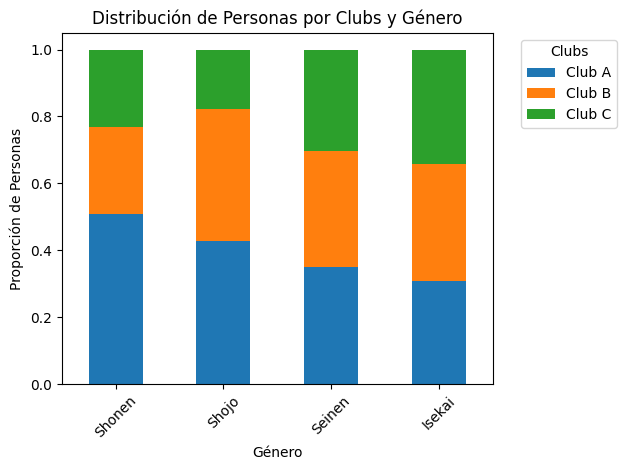

P(Club_C) = 0.2636
P(Club_C | Isekai) = 0.3413


In [20]:
# Gráfico
prob_genero_club.plot(kind='bar', stacked=True)
plt.title('Distribución de Personas por Clubs y Género')
plt.xlabel('Género')
plt.ylabel('Proporción de Personas')
plt.xticks(rotation=45)
plt.legend(title='Clubs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('distribucion_personas_clubs_area.png')
plt.show()

# Resultados
p_club_c = prob_genero_club.mean(axis=0)['Club C']
p_club_c_given_isekai = prob_genero_club.loc['Isekai', 'Club C']
print(f"P(Club_C) = {p_club_c:.4f}")
print(f"P(Club_C | Isekai) = {p_club_c_given_isekai:.4f}")